# SOBRE O CONJUNTO DE DADOS:
O "Covid19_Dataset" contém uma coleção abrangente de dados da COVID-19, com foco em tendências globais e métricas específicas relacionadas a países. Este conjunto de dados inclui estatísticas importantes, como contagens diárias de casos, taxas de mortalidade e taxas de vacinação ao longo do tempo. Os dados são provenientes de organizações de saúde respeitáveis ​​e fornecem insights sobre a progressão da pandemia, permitindo uma análise e visualização aprofundadas do impacto da COVID-19. Este conjunto de dados é adequado para pesquisadores, cientistas de dados e autoridades de saúde pública que buscam entender a dinâmica da COVID-19 e suas implicações na saúde global.

In [19]:
# Tirar avisos
import warnings
warnings.filterwarnings('ignore')

# Bliotecas que serão ultilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

df = pd.read_csv('/content/covid_data.csv')

In [21]:
# Alterando nome das principais colunas para português[BRA] ...
df.rename(columns = {
    'iso_code': 'codigo_iso',
    'continent': 'continente',
    'location': 'localizacao',
    'date': 'data',
    'total_cases': 'total_casos',
    'new_cases': 'novos_casos',
    'new_cases_smoothed': 'novos_casos_suavizados',
    'total_deaths': 'total_mortes',
    'new_deaths': 'novas_mortes',
    'new_deaths_smoothed': 'novas_mortes_suavizadas',
    'female_smokers':'fumantes_femininos',
    'male_smokers':'fumantes_masculinos',
    'handwashing_facilities': 'instalacoes_lavagem_maos',
    'hospital_beds_per_thousand': 'leitos_hospitalares_por_mil',
    'life_expectancy': 'expectativa_vida',
    'human_development_index': 'indice_desenvolvimento_humano',
    'population': 'populacao',
    'excess_mortality_cumulative_absolute': 'mortalidade_excesso_acumulado_absoluto',
    'excess_mortality_cumulative': 'mortalidade_excesso_acumulado',
    'excess_mortality': 'mortalidade_excesso',
    'excess_mortality_cumulative_per_million': 'mortalidade_excesso_acumulado_por_milhao'
}, inplace= True)



# TRATANDO OS DADOS

In [22]:
# Converter a coluna 'data' para o formato data e hora
df['data'] = pd.to_datetime(df['data'])

# Verifique se há valores ausentes:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
continente,3359
localizacao,1
data,1
total_casos,15
novos_casos,16
...,...
populacao,1
mortalidade_excesso_acumulado_absoluto,49862
mortalidade_excesso_acumulado,49862
mortalidade_excesso,49862


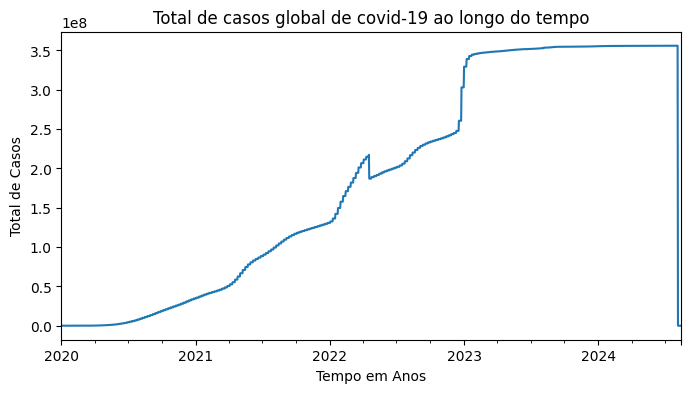

In [23]:

plt.figure(figsize=(8, 4))
df.groupby('data')['total_casos'].sum().plot()
plt.title('Total de casos global de covid-19 ao longo do tempo')
plt.xlabel('Tempo em Anos')
plt.ylabel('Total de Casos')
plt.show()


## 2° Total de Casos por Continente - criar boxplot para o total de casos em cada continente

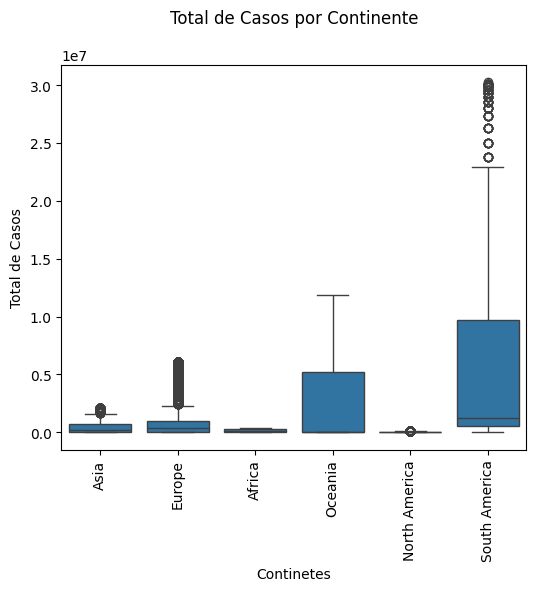

In [24]:
plt.figure(figsize=(6,5))
sns.boxplot(y='total_casos',x='continente', data=df)
plt.title("Total de Casos por Continente", pad=30)
plt.xlabel("Continetes")
plt.ylabel("Total de Casos")
plt.xticks(rotation=90)
plt.show()

## 3° Analisar a Relação entre Total de Casos e Total de Mortes - pode usar um scartterplot para mostrar essa relação.

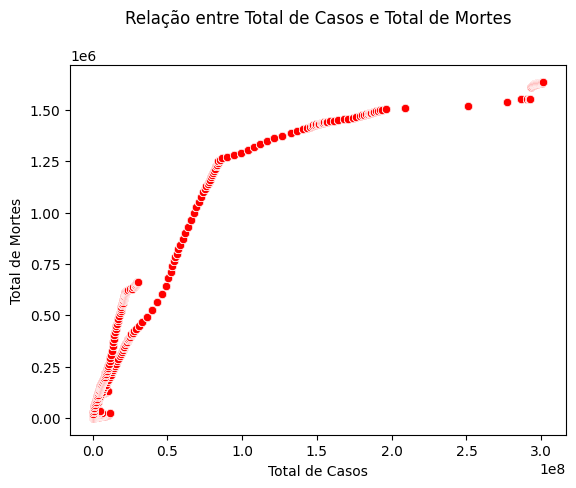

In [25]:
sns.scatterplot(x='total_casos', y='total_mortes' , data = df , color='red')
plt.title('Relação entre Total de Casos e Total de Mortes' ,pad = 30)
plt.xlabel("Total de Casos")
plt.ylabel("Total de Mortes")
plt.show()

## 4° Analisar a taxa de novas mortes por país entre os 400 dias com o maior númeor de novas mortes - pode criar um barplot onde teria uma barra para cada país e o eixo Y seria a taxa de novas_mortes

# #novas_mortes

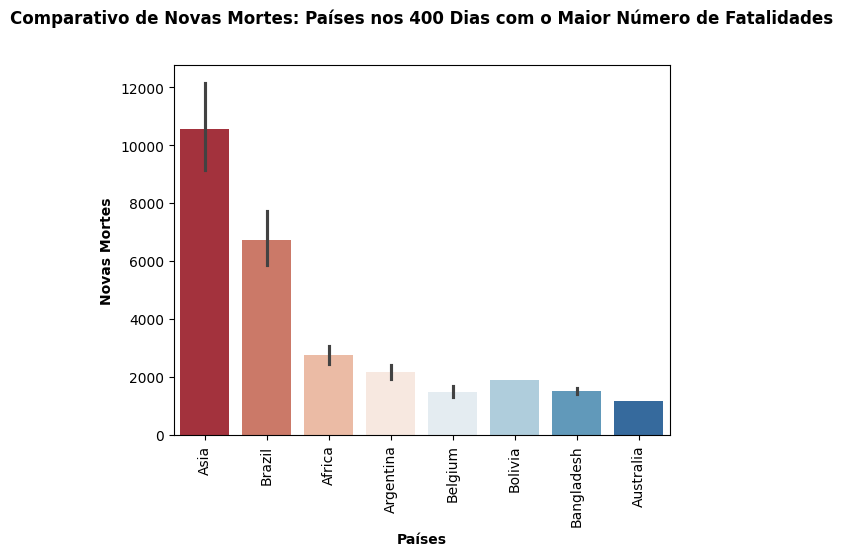

In [27]:
# Ordenar os dados de novas mortes dos maior para os menor
maiores = df.sort_values(by='novas_mortes', ascending=False)
dados = maiores[0:400]

sns.barplot(x='localizacao', y='novas_mortes' , data= dados, palette='RdBu')

plt.title("Comparativo de Novas Mortes: Países nos 400 Dias com o Maior Número de Fatalidades" , pad=30 , fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel("Novas Mortes",fontweight='bold')
plt.xlabel("Países",fontweight='bold')
plt.show()



## 5° Expectativa de Vida por Continente - poderia usar o barplot ou o violinplot para essa analise, continente no eixo x e expectativa de vida no eixo Y

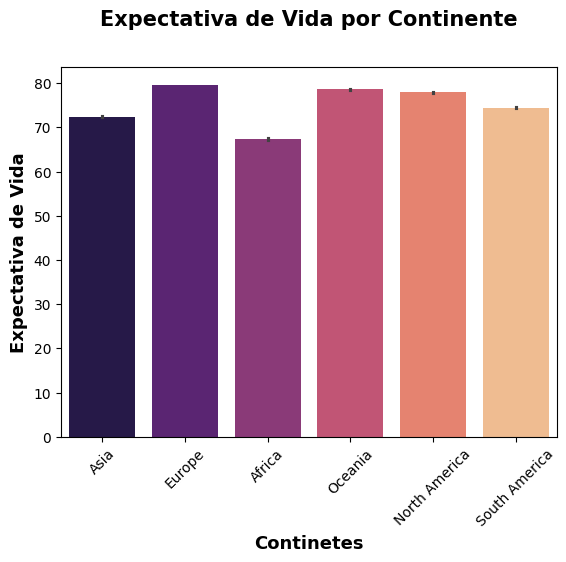

In [28]:
sns.barplot(x='continente', y='expectativa_vida' , data = df,  palette='magma' )
plt.title("Expectativa de Vida por Continente" , pad=30, fontweight='bold', fontsize=15)
plt.xlabel("Continetes",fontweight='bold', fontsize=13)
plt.ylabel("Expectativa de Vida",fontweight='bold' , fontsize=13)
plt.xticks(rotation=45)
plt.show()

## 6° Talvez seja interessante analisar a quantidade de fumantes por continente - barplot

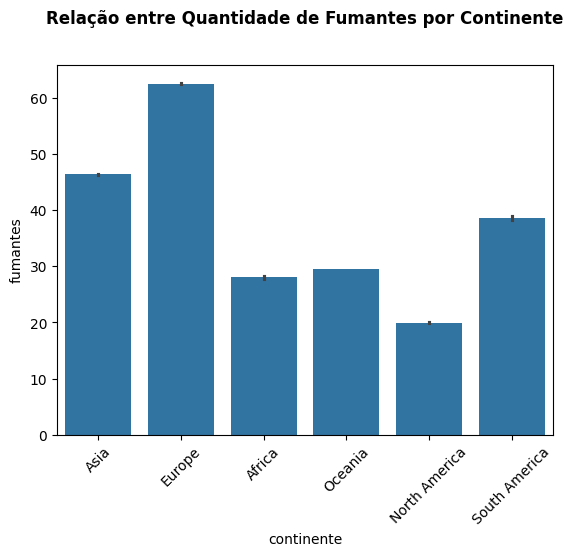

In [29]:
#Criando a coluna fumante...
df['fumantes'] = df['fumantes_masculinos'] + df['fumantes_femininos']

sns.barplot(x='continente', y='fumantes',data=df)
plt.title("Relação entre Quantidade de Fumantes por Continente" , fontweight='bold' ,pad=30)
plt.xticks(rotation=45)
plt.show()




## 7° Analisar o Número de Leitos de hospitais por mil habitantes e total de casos e diferenciar por continente - Para essa analise pode usar um scartterplot com o continentee sendo o hue

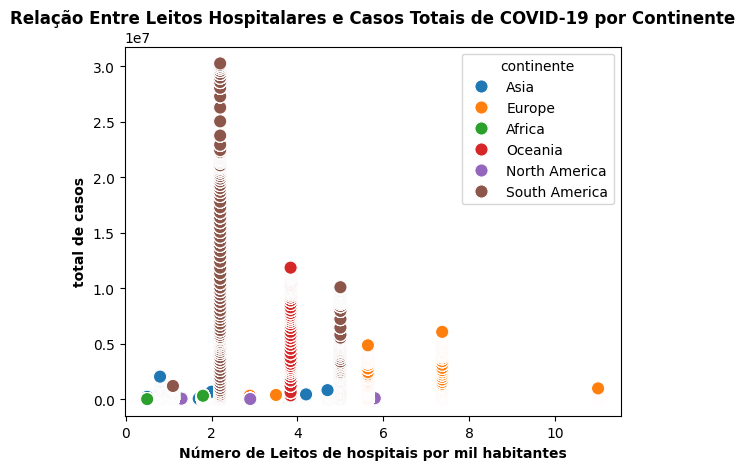

In [30]:
sns.scatterplot(x='leitos_hospitalares_por_mil',y='total_casos' , data=df , hue='continente', s=90)
plt.title("Relação Entre Leitos Hospitalares e Casos Totais de COVID-19 por Continente", fontweight='bold')
plt.xlabel("Número de Leitos de hospitais por mil habitantes", fontweight='bold')
plt.ylabel("total de casos",fontweight='bold')

plt.show()

### 8° Analisar a relação entre a Expectativa de Vida e os fumantes - pode usar um scartteplot também

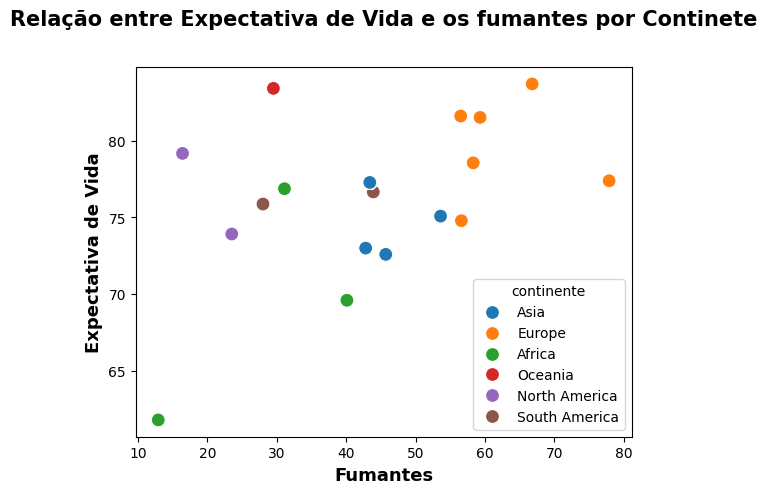

In [32]:
sns.scatterplot(x='fumantes', y='expectativa_vida', data=df , hue='continente', s=100)

plt.title("Relação entre Expectativa de Vida e os fumantes por Continete" , pad=30, fontweight='bold', fontsize=15)
plt.xlabel("Fumantes",fontweight='bold', fontsize=13)
plt.ylabel("Expectativa de Vida",fontweight='bold' , fontsize=13)
plt.show()